In [1]:
import pandas as pd
import json 
from statannot import add_stat_annotation
import seaborn as sns
from Bio.SeqUtils import GC
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import stats

In [20]:
from itertools import combinations

In [21]:
df=pd.read_excel(r"C:\Users\nwntas\Enriched transcripts.xlsx",header=[1])

In [237]:
half_life=pd.read_excel(r"C:\Users\nwntas\Downloads\pnas.1712312115.sd01.xlsx",sheet_name="S2-Modeling Results",skiprows=[0,1,2,3])

In [238]:
WT_half_lives=dict(zip(half_life["Unnamed: 0"].to_list(),map(lambda x: np.log(2)/x, half_life['alpha_WT'].to_list())))

C:\Users\nwntas\AppData\Local\Temp\ipykernel_11436\233326238.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  WT_half_lives=dict(zip(half_life["Unnamed: 0"].to_list(),map(lambda x: np.log(2)/x, half_life['alpha_WT'].to_list())))


In [22]:
import json
with open(r"C:/Users/nwntas/RCBS_scores.json") as f:
    MFEde_UTR3=json.load(f)
MFEde_UTR3=dict(map(lambda x:(x[0][:-2],x[1]),MFEde_UTR3.items()))

In [23]:
MFEde_UTR3=dict(filter(lambda x: not np.isnan(x[1]),MFEde_UTR3.items()))

In [426]:
#MFEde_UTR3=dict(map(lambda x: (x[0],x[1][0]), MFEde_UTR3.items()))

In [908]:
df2=pd.read_excel(r"C:\Users\nwntas\co_regulons_new_andria.xlsx", sheet_name="HS APEAL RIP up 0.8")
coRegs_heat=list(df2['Co-regulons'].dropna().unique())

In [909]:
df2=pd.read_excel(r"C:\Users\nwntas\co_regulons_new_andria.xlsx", sheet_name="NS APEAL RIP up 0.8")
coRegs_mock=list(df2['Co-regulons'].dropna().unique())

In [24]:
from collections import defaultdict

dic=defaultdict(str)
with open(r"C:/Users/nwntas/Araport11_cds_20220914") as f:
    line='1'
    while line:
        line=f.readline().strip()
        if ">" in line:
            name=line[1:line.index("|")-1]
            continue
        dic[name]+=line  

In [25]:
CDS=dict(dic)
CDS=dict(map(lambda x: (x[0][:-2],x[1]),filter(lambda x: ".1" in x[0],CDS.items())))

In [5]:
import json
with open(r"C:\Users\nwntas\UTR3.json","w") as f:
    json.dump(dic,f)

In [35]:
CDS=dict(filter(lambda x:x[0] in LogFC,CDS.items()))

In [18]:
import json
with open(r"C:\Users\nwntas\UTR5_Length.json",'w') as f:
    json.dump(all_genes,f)

In [1154]:
#Just for CoRegs
coRegs_uni=set(coRegs_heat)&set(mock_genes)

In [36]:
heat_genes=list(filter(lambda x: x in CDS,df[df["Log ratio heat"]>1]["geneID"].to_list()))

mock_genes=list(filter(lambda x: x in CDS,df[df["Log ratio mock"]>1]["geneID"].to_list()))

In [26]:
LogFC=dict(filter(lambda x: x[0] in CDS.keys(), RMA_finals.items()))

In [28]:
ids=df["geneID"].to_list()

In [30]:
mock_LogFC=df["Log ratio heat"].to_list()

In [47]:
LogFC=dict(zip(ids,mock_LogFC))

In [37]:
CDS_enriched_m=dict(map(lambda x: (x, len(CDS[x])), filter(lambda x: x in CDS.keys(),mock_genes)))
CDS_enriched_h=dict(map(lambda x: (x, len(CDS[x])), filter(lambda x: x in CDS.keys(),heat_genes)))

#CoRegs=dict(map(lambda x: (x, len(CDS[x])), filter(lambda x: x in CDS.keys(),coRegs_uni)))


all_genes=dict(map(lambda x: (x, len(CDS[x])), filter(lambda x: x in CDS.keys(),df["geneID"].to_list())))


In [54]:
log_vals=[LogFC[k]for k in CDS_enriched_h.keys()]

In [32]:
from collections import defaultdict

def binning(inputs,category="CDS"):
    bins=defaultdict(list)
    
    if category=='CDS':
        
        for i in range(40,48,2):
            if i==40:
                bins["<42"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: x[1]<42,inputs.items())))
                continue
            if i==46:
                bins["46<"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: 46<=x[1],inputs.items())))
                continue
            bins[f"{i}-{i+2}"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: i<=x[1]<i+2,inputs.items())))
        return bins
    
    if category=='UTR_5':
        
        for i in range(30,50,5):
            if i==30:
                bins["<35"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: x[1]<35,inputs.items())))
                continue
            if i==45:
                bins["45<"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: 45<=x[1],inputs.items())))
                continue
            bins[f"{i}-{i+5}"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: i<=x[1]<i+5,inputs.items())))
        return bins
    
    if category=='UTR_3':
        
        for i in range(25,45,5):
            if i==25:
                bins["<30"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: x[1]<30,inputs.items())))
                continue
            if i==40:
                bins["40<"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: 40<=x[1],inputs.items())))
                continue
            bins[f"{i}-{i+5}"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: i<=x[1]<i+5,inputs.items())))
        return bins
    
    if category=='CDS_len':
        
        for i in range(0,3200,800):
            if i==0:
                bins["<800"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: x[1]<800,inputs.items())))
                continue
            if i==2400:
                bins["2400<"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: 2400<=x[1],inputs.items())))
                continue
            bins[f"{i}-{i+800}"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: i<=x[1]<i+800,inputs.items())))
        return bins
    
    if category=='UTR_5_len':
        
        for i in range(0,400,100):
            if i==0:
                bins["<100"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: x[1]<100,inputs.items())))
                continue
            if i==300:
                bins["300<"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: 300<=x[1],inputs.items())))
                continue
            bins[f"{i}-{i+100}"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: i<=x[1]<i+100,inputs.items())))
        return bins
    
    if category=='UTR_3_len':
        
        for i in range(0,600,150):
            if i==0:
                bins["<150"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: x[1]<150,inputs.items())))
                continue
            if i==450:
                bins["450<"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: 450<=x[1],inputs.items())))
                continue
            bins[f"{i}-{i+150}"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: i<=x[1]<i+150,inputs.items())))
        return bins
    
    if category=='CDS_coRegs':
        
        for i in range(42,48,2):
            if i==42:
                bins["<44"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: x[1]<44,inputs.items())))
                continue
            if i==46:
                bins["46<"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: 46<=x[1],inputs.items())))
                continue
            bins[f"{i}-{i+2}"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: i<=x[1]<i+2,inputs.items())))
        return bins
    
    if category=='UTR_5_coRegs':
        
        for i in range(30,45,5):
            if i==30:
                bins["<35"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: x[1]<35,inputs.items())))
                continue
            if i==40:
                bins["40<"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: 40<=x[1],inputs.items())))
                continue
            bins[f"{i}-{i+5}"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: i<=x[1]<i+5,inputs.items())))
        return bins
    
    if category=='UTR_3_coRegs':
        
        for i in range(25,40,5):
            if i==25:
                bins["<30"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: x[1]<30,inputs.items())))
                continue
            if i==35:
                bins["35<"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: 35<=x[1],inputs.items())))
                continue
            bins[f"{i}-{i+5}"]=list(map(lambda y:LogFC[y[0]],filter(lambda x: i<=x[1]<i+5,inputs.items())))
        return bins

In [56]:
a=binning(CDS_enriched_h,"CDS_len")

In [412]:
a={k:np.abs(np.array(v)) for k,v in a.items()}

In [413]:
{k:len(v) for k,v in a.items()}

{'<30': 55, '30-35': 61, '35-40': 24, '40<': 28}

In [414]:
points={k:list(filter(lambda x: 1<=x<=4,v))for k,v in a.items()}

In [415]:
import scikit_posthocs as sp
results=np.triu(sp.posthoc_dunn(list(a.values()), p_adjust = 'bonferroni'),1)
indices=np.nonzero(results)
p_vals=results[indices].tolist()

In [416]:
ps=list(map(lambda x: "ns"if x>=0.05 else "$"+f"{x:.2e}"f"{x}"[:f"{x:.2e}".index("-")].replace("e","\cdot10^{%s}"%f"{x:.2e}"[f"{x:.2e}".index("-"):])+"$",p_vals))

In [417]:
res=dict(zip(combinations(list(a.keys()),2),p_vals))

In [105]:
#comparison_vals=defaultdict(list)

def add_p_table(measure,Type,category,results):
    for k,v in results.items():
        comparison_vals["Type"]+=[Type]
        comparison_vals["Measure"]+=[measure]
        comparison_vals["Category"]+=[category]
        comparison_vals["Comparison"]+=[f"{k[0]}/{k[1]}"]
        comparison_vals["p-value"]+=[v]

In [422]:
add_p_table("GC","3' UTR","heat PB-out",res)

In [20]:
from matplotlib import gridspec

<30 v.s. 30-35: Custom statistical test, P_val:1.000e+00
30-35 v.s. 35-40: Custom statistical test, P_val:4.800e-01
35-40 v.s. 40<: Custom statistical test, P_val:2.218e-01
<30 v.s. 35-40: Custom statistical test, P_val:4.485e-02
30-35 v.s. 40<: Custom statistical test, P_val:6.798e-05
<30 v.s. 40<: Custom statistical test, P_val:6.284e-07


C:\Users\nwntas\AppData\Local\Temp\ipykernel_15368\1562849085.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(list(map(lambda x: str(x),-np.arange(0.5,4.5,0.5))))


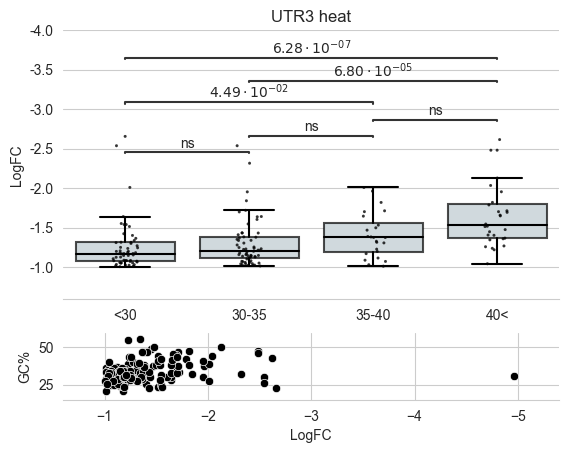

In [423]:
gs=gridspec.GridSpec(2,1,height_ratios=[4,1])

ax0=plt.subplot(gs[0,0])
sns.set_style("whitegrid")

PROPS = {
    'boxprops':{'facecolor':'#d0d9dd', 'edgecolor':(0,0,0,0.7)},
    'medianprops':{'color':'k'},
    'whiskerprops':{'color':'k'},
    'capprops':{'color':'k'}
}

sns.boxplot(data=list(a.values()),showfliers=False,**PROPS)
sns.stripplot(data=list(points.values()),alpha=.8,color="#020202",linewidth=0.1,dodge=True,jitter=True,size=2)

test_results=add_stat_annotation(ax=ax0,x=list(a.keys()),
                                           y=list(map(lambda x: np.median(x),a.values())),
                                           box_pairs=list(combinations(list(a.keys()),2)),
                                           pvalues=p_vals,
                                           text_annot_custom=ps,
                                           text_format="simple",
                                           loc="inside",
                                           verbose=1,
                                           perform_stat_test=False,
                                           line_offset_to_box=0.68,
                                           line_height=0.01,
                                           line_offset=0.045)
ax0.set_xticklabels(list(a.keys()))
ax0.set_ylim([0.6,4])
ax0.set_yticklabels(list(map(lambda x: str(x),-np.arange(0.5,4.5,0.5))))
ax0.set_title("UTR3 heat")
ax0.set_ylabel("LogFC")
            
ax1=plt.subplot(gs[1,0])
sns.scatterplot(x=log_vals,y=list(CDS_enriched_h.values()),color="k")
ax1.set_xlim([-0.6,-5.4])
#ax1.set_yscale("log")
ax1.set_ylim([15,60])
ax1.set_xlabel("LogFC")
ax1.set_ylabel("GC%")

sns.despine(left=True, bottom=False)
plt.savefig("UTR3_heat_PBout_final.tiff")

In [302]:
#spearman_vals=defaultdict(list)

def add_spearman_table(measure,Type,category,spearman):
    spearman_vals["Type"]+=[Type]
    spearman_vals["Measure"]+=[measure]
    spearman_vals["Category"]+=[category]
    spearman_vals["Score"]+=[spearman[0]]
    spearman_vals["p-value"]+=[spearman[1]]

In [424]:
from scipy.stats import spearmanr
add_spearman_table("GC","3' UTR","heat PB-out",spearmanr(log_vals,list(CDS_enriched_h.values())))

In [425]:
spearman_vals

{'Type': ['CDS',
  'CDS',
  'CDS',
  'CDS',
  "5' UTR",
  "5' UTR",
  "5' UTR",
  "5' UTR",
  "3' UTR",
  "3' UTR",
  "3' UTR",
  "3' UTR"],
 'Measure': ['GC',
  'GC',
  'Length',
  'Length',
  'Length',
  'Length',
  'GC',
  'GC',
  'Length',
  'Length',
  'GC',
  'GC'],
 'Category': ['mock PB-out',
  'heat PB-out',
  'heat PB-out',
  'mock PB-out',
  'mock PB-out',
  'heat PB-out',
  'heat PB-out',
  'mock PB-out',
  'heat PB-out',
  'mock PB-out',
  'mock PB-out',
  'heat PB-out'],
 'Score': [-0.03996582878386013,
  -0.045979091161368495,
  0.10391612303208989,
  0.1622532970165668,
  0.04428530127095494,
  -0.09111329342669952,
  -0.23153554957682634,
  0.05218016770654298,
  -0.17729139003239666,
  0.018720851633955943,
  0.06819111681257503,
  -0.36423503330177215],
 'p-value': [0.4046149212430129,
  0.5137415196872068,
  0.1391119263998488,
  0.0006623591923428705,
  0.37643817360831544,
  0.24015839254053373,
  0.0025295703333679718,
  0.29724693331755475,
  0.02150233059875383

In [428]:
pd.DataFrame(spearman_vals).to_csv("Correlation_PB_out.csv",index=False)

In [427]:
#comparison_vals=dd[~(dd["Category"].str.contains("CoRegs"))&~(dd["Category"].str.contains("coRegs"))].to_dict("list")

In [308]:
from statannot import add_stat_annotation
from itertools import combinations
sns.set_style("whitegrid")

dunns_results=sp.posthoc_dunn(list(dic.values()), p_adjust = 'bonferroni')
p_vals=dunns_results[1][1:].to_list()+dunns_results[2][2:].to_list()+[dunns_results[3][4]]

flierprops = dict(marker='o', markersize=2, markerfacecolor='None')
pl=sns.boxplot(data=list(dic.values()),flierprops=flierprops, showfliers=False, color="#d24d2d")
#pl.set_xticklabels(sorted(list(dic.keys())))
pl.set_xticklabels(list(dic.keys()))
#pl.set_ylim([-1,2])
pl.set_title("CDS heat samples")
pl.set_ylabel("Log2FC")
pl.set_xlabel("Length(nt)")

test_results=add_stat_annotation(ax=pl,x=list(dic.keys()),
                                           y=list(map(lambda x: np.median(x),dic.values())),
                                           box_pairs=list(combinations(list(dic.keys()),2)),
                                           pvalues=p_vals,
                                           text_format="star",
                                           loc="inside",
                                           verbose=1,
                                           perform_stat_test=False,
                                           line_offset_to_box=0.5)

sns.despine(left=True, bottom=False)

plt.savefig("CDS_heat_len_with_significance_all.tiff")

KeyboardInterrupt: 

In [14]:
from scipy.stats import f_oneway
from scipy import stats

#Test for normality shows that samples are not normally distributed and thus i cannot do ANOVA. I choose
#a non-parametric approach called the Kruskal-Wallis test which is a one-way ANOVA done on the ranks of the samples
#H0: That the median of all samples is the same

#stats.shapiro(dic["47-60"]) #example

#stats.kruskal(dic["18-168"],dic["168-263"],dic["263-355"],dic["355-1385"])

#Dunn's Test is a post-hoc test for non-parametric data that has the null hypothesis that two samples have the same median
import scikit_posthocs as sp
sp.posthoc_dunn(list(dic.values()), p_adjust = 'bonferroni')

,1,2,3,4
1,1.000000,1.000000,1.0,0.311898
2,1.000000,1.000000,1.0,0.415538
3,1.000000,1.000000,1.0,1.000000
4,0.311898,0.415538,1.0,1.000000


In [14]:
#For the CDS of PB enr mock samples we see that there is slightly higher enrichment with higher GC content levels
#Kruskal ANOVA: Stat: 25.590013804593106, p-val: 1.162109464756434e-05
#Dunn's post-hoc: 3-4 vs 1-2// p-val<0.05// Check table for more info

In [573]:
stats.kruskal(dic["0-106"],dic["106-225"],dic["225-310"],dic["310-3278"])

KruskalResult(statistic=3.2675767314357245, pvalue=0.3521809141453853)

In [15]:
from collections import Counter

In [513]:
CDS_enr_nums=dict(Counter(list(map(lambda x:round(x[1]),CDS_enriched.items()))))
CDS_enr_nums=dict(sorted(CDS_enr_nums.items(),key=lambda x: x[0]))

In [514]:
CDS_depl_nums=Counter(list(map(lambda x:round(x[1]),CDS_depleted.items())))
CDS_depl_nums=dict(sorted(CDS_depl_nums.items(),key=lambda x: x[0]))


CDS_all_nums=Counter(list(map(lambda x:round(x[1]),all_genes.items())))
CDS_all_nums=dict(map(lambda x: (str(x[0]),x[1]),dict(CDS_all_nums).items()))
CDS_all_nums=dict(sorted(CDS_all_nums.items(),key=lambda x: x[0]))

In [85]:
{k:len(v)for k,v in al.items()}

{'<800': 19935, '800-1600': 0, '1600-2400': 0, '2400<': 0}

In [33]:
import scipy

In [38]:
m=binning(CDS_enriched_m,"CDS_len")

In [39]:
h=binning(CDS_enriched_h,"CDS_len")

In [40]:
al=binning(all_genes,"CDS_len")

In [44]:

DataFrame ={
    "Metric":[],
    "Bin":[],
    "Group":[]
}

In [47]:
for k in al.keys():
    for i in al[k]:
        DataFrame["Bin"]+=[k]
        DataFrame["Metric"]+=[i]
        DataFrame["Group"]+=["All"]

In [48]:
dd=pd.DataFrame(DataFrame)

In [49]:
dd.replace([np.inf, -np.inf], np.nan, inplace=True)
dd.dropna(inplace=True)
#dd=dd[dd["Metric"]<=500]

In [50]:
pairs=[((k,j),(k,q)) for k in al.keys() for j,q in combinations(["All","Heat","Mock"],r=2)]

In [51]:
p_vals=[scipy.stats.mannwhitneyu(al[k],h[k]) for k in al.keys()]+[scipy.stats.mannwhitneyu(al[k],m[k]) for k in al.keys()]+[scipy.stats.mannwhitneyu(m[k],h[k]) for k in al.keys()]
p_vals=[p_vals[i][1]*12 for j in range(4) for i in range(j,12,4)]

In [52]:
ps=list(map(lambda x: "ns"if x>=0.05 else "$"+f"{x:.2e}"f"{x}"[:f"{x:.2e}".index("-")].replace("e","\cdot10^{%s}"%f"{x:.2e}"[f"{x:.2e}".index("-"):])+"$",p_vals))

800-1600_Heat v.s. 800-1600_All: Custom statistical test, P_val:5.916e+00
1600-2400_Heat v.s. 1600-2400_All: Custom statistical test, P_val:9.114e-01
1600-2400_Mock v.s. 1600-2400_Heat: Custom statistical test, P_val:1.051e+01
2400<_Heat v.s. 2400<_All: Custom statistical test, P_val:9.664e+00
2400<_Mock v.s. 2400<_Heat: Custom statistical test, P_val:3.947e+00
<800_Heat v.s. <800_All: Custom statistical test, P_val:1.164e+01
<800_Mock v.s. <800_Heat: Custom statistical test, P_val:3.934e-01
800-1600_Mock v.s. 800-1600_Heat: Custom statistical test, P_val:3.066e+00
1600-2400_Mock v.s. 1600-2400_All: Custom statistical test, P_val:3.844e+00
2400<_Mock v.s. 2400<_All: Custom statistical test, P_val:2.667e+00
800-1600_Mock v.s. 800-1600_All: Custom statistical test, P_val:4.974e+00
<800_Mock v.s. <800_All: Custom statistical test, P_val:1.416e-01


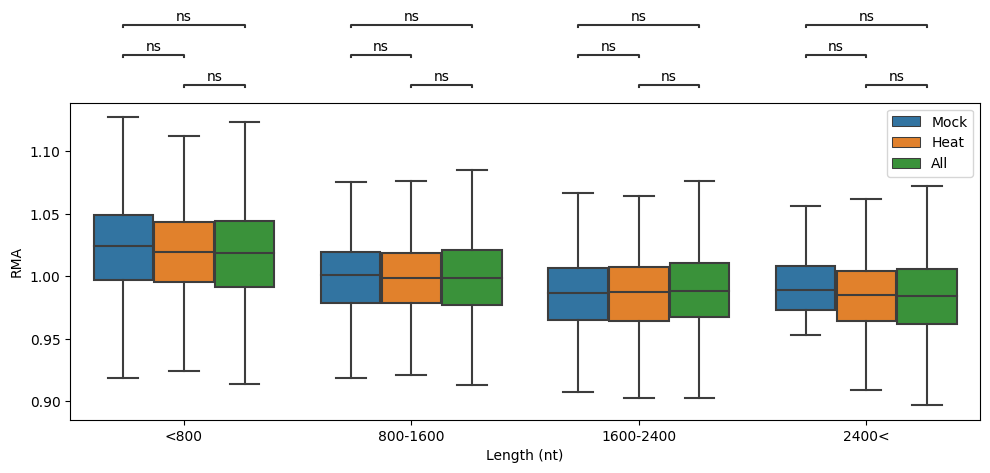

In [54]:
fig, ax=plt.subplots(figsize=(10,5))
aa=sns.boxplot(data=dd, x="Bin",y="Metric",hue="Group", showfliers=False)

nobs = dd.groupby(["Bin","Group"])["Metric"].aggregate("count").values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

ax.set_ylabel("RMA")
#ax.set_xlabel("GC%")
ax.set_xlabel("Length (nt)")
#ax.set_yscale("log")
#ax.set_ylim([-15,35])
test_results=add_stat_annotation(ax=ax,data=dd, x="Bin",
                                           y="Metric",
                                           hue="Group",
                                           box_pairs=pairs,
                                           pvalues=p_vals,
                                           text_annot_custom=ps,
                                           text_format="simple",
                                           loc="outside",
                                           verbose=1,
                                           perform_stat_test=False,
                                           line_offset_to_box=0.1,
                                           line_height=0.005,
                                           line_offset=0.05)
aa.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.savefig("RMA_CDS_intra_Length.tiff")

In [49]:
import scipy

In [55]:
res=dict(zip(pairs,p_vals))

In [58]:
comparison_vals=defaultdict(list)

def add_p_table(measure,Type,statistic,results):
    for k,v in results.items():
        comparison_vals["Type"]+=[Type]
        comparison_vals["Measure"]+=[measure]
        comparison_vals["Bin"]+=[k[0][0]]
        comparison_vals["Comparison"]+=[f"{k[0][1]}/{k[1][1]}"]
        comparison_vals["Statistic"]+=[statistic]
        comparison_vals["p-value"]+=[v]

In [59]:
res=dict(zip(pairs,p_vals))
add_p_table("Length","CDS","RMA",res)

In [179]:
da=pd.DataFrame(comparison_vals)

In [285]:
da=da[~(da["Measure"]=="Half Life")]

In [289]:
comparison_vals=da.to_dict("list")

In [280]:
comparison_vals.keys()

dict_keys(['Type', 'Measure', 'Bin', 'Comparison', 'p-value', 'Statistic'])

In [465]:
da

,Type,Measure,Bin,Comparison,p-value,Statistic
0,5' UTR,GC,<35,All/Heat,2.522806e+00,MFEde
1,5' UTR,GC,<35,All/Mock,8.257592e-05,MFEde
2,5' UTR,GC,<35,Heat/Mock,4.568447e-02,MFEde
3,5' UTR,GC,35-40,All/Heat,6.451832e+00,MFEde
4,5' UTR,GC,35-40,All/Mock,1.899281e-01,MFEde
...,...,...,...,...,...,...
139,CDS,GC,44-46,All/Mock,2.588011e-07,RCBS
140,CDS,GC,44-46,Heat/Mock,1.131291e+00,RCBS
141,CDS,GC,46<,All/Heat,9.161758e-06,RCBS
142,CDS,GC,46<,All/Mock,1.767540e-01,RCBS


In [4]:
import numpy as np

In [181]:
da.to_excel("p_values_RMA.xlsx",index=False)

In [8]:
import pandas as pd

In [125]:
AGI_tags=pd.read_csv(r"C:\Users\nwntas\tags.csv")

In [126]:
AGI=dict(zip(AGI_tags['Unnamed: 0'].to_list(),AGI_tags["x"].to_list()))

In [127]:
RMA_vals=pd.read_csv(r"C:\Users\nwntas\intensity.csv")

In [128]:
RMA_vals["ID"]=RMA_vals["ID"].map(lambda x: AGI[x] if x in AGI.keys() else None)

In [129]:
RMA_vals=RMA_vals.dropna()

In [143]:
def get_fraction(row):
    return  np.mean([row['GSM1077277_POLY-22-1.CEL'],row['GSM1077278_POLY-22-2.CEL']])/np.mean([row['GSM1077273_TOT-22-1.CEL'],row['GSM1077274_TOT-22-2.CEL']])

In [178]:
RMA_vals["Average_mock"]=RMA_vals.apply(lambda x:get_fraction(x),axis=1)

KeyError: 'GSM1077277_POLY-38-1.CEL'

In [ ]:
RMA_vals

In [134]:
RMA_finals=dict(zip(RMA_vals["ID"].to_list(),RMA_vals["Average_mock"].to_list()))

In [18]:
import json

In [19]:
with open(r"C:\Users\nwntas\RCBS_scores.json") as f:
    RCBS=json.load(f)

In [173]:
sames=dict(filter(lambda x: not np.isinf(x[0]),sames.items()))

In [172]:
sames={RCBS[i]:RMA_finals[i[:-2]] if i[:-2] in RMA_finals.keys() else 0 for i in RCBS.keys() if i[:-2] in heat_genes}

In [174]:
sames=dict(filter(lambda x: x[1]!=0,sames.items()))

In [64]:
from sklearn.linear_model import LinearRegression

In [175]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(np.array(list(sames.values())).reshape(-1,1),np.array(list(sames.keys())).reshape(-1,1))
reg.coef_,reg.intercept_

(array([[0.16510476]]), array([-0.00107697]))

C:\Users\nwntas\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


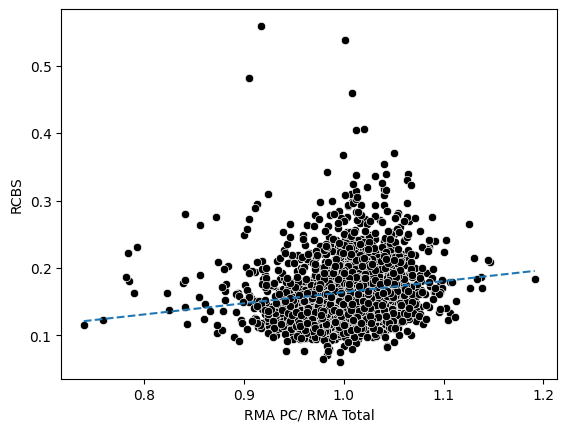

In [176]:
fig=sns.scatterplot(x=list(sames.values()),y=list(sames.keys()),color="k")
sns.lineplot(list(sames.values()), [float(reg.coef_*i + reg.intercept_) for i in list(sames.values())],linestyle="--")
fig.set_xlabel("RMA PC/ RMA Total")
fig.set_ylabel("RCBS")
#fig.set_ylim([0.0,1.65])
plt.savefig("RCBS_RMA_heat.tiff",dpi=300)

In [177]:
stats.pearsonr(list(sames.values()),list(sames.keys()))

C:\Users\nwntas\AppData\Local\Temp\ipykernel_10812\395593518.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.pearsonr(list(sames.values()),list(sames.keys()))


PearsonRResult(statistic=0.1537347524293221, pvalue=1.8910853615975478e-13)

In [117]:
print(np.gradient)

<function gradient at 0x00000148AC31FF70>


In [76]:
from scipy.stats import pearsonr